In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from sklearn.datasets import make_regression, make_classification, make_blobs

# Create Dataset

In [2]:
# 回帰用人工データを作成
X_reg, y_reg = make_regression(n_samples=3000,
                               n_features=10,
                               n_informative=7,
                               n_targets=1,
                               bias=23.0,
                               noise=0.3,    # ノイズの標準偏差
                               shuffle=True,
                               random_state=923)

In [3]:
# 2クラス分類用の人工データを作成
X_2, y_2 = make_classification(n_samples=1000,
                               n_features=15,
                               n_informative=8,
                               n_redundant=7,    # 冗長な特徴量の数
                               n_classes=2,
                               n_clusters_per_class=1,    # クラスごとのクラスターの数
                               weights=[0.6, 0.4],    # 各クラスのデータの割合
                               shift=24.0,
                               scale=1.0,
                               flip_y=0.05,    # 入れ替えるデータの割合
                               shuffle=True,
                               random_state=925)

In [4]:
# 多クラス(5クラス)分類用の人工データを生成
X_5, y_5 = make_blobs(n_samples=1000,
                      n_features=2,
                      centers=5,
                      cluster_std=3.0,
                      center_box=(-20, 25),
                      shuffle=True,
                      random_state=84)

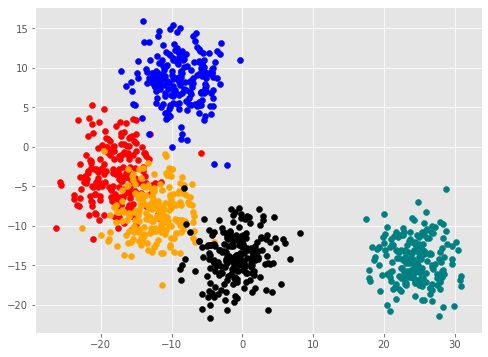

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X_5[:, 0][y_5==0], X_5[:, 1][y_5==0], c="red")
plt.scatter(X_5[:, 0][y_5==1], X_5[:, 1][y_5==1], c="blue")
plt.scatter(X_5[:, 0][y_5==2], X_5[:, 1][y_5==2], c="teal")
plt.scatter(X_5[:, 0][y_5==3], X_5[:, 1][y_5==3], c="orange")
plt.scatter(X_5[:, 0][y_5==4], X_5[:, 1][y_5==4], c="black")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=9)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=9)
X_train_5, X_val_5, y_train_5, y_val_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=9)

# XGBoost

In [7]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as ac

def rmse(pred, true):
    rmse = np.sqrt(mse(pred, true))
    return rmse

In [8]:
import xgboost as xgb

### Parameters

General parameters  
  
・ booster  
・・ gbtree (default)  
・・ dart  
・・ gblinear  
  
・ silent  
・・ 0 起動中のメッセージを出力 (default)  
・・ 1 出力しないサイレントモード
  
Booster parameters  
  
・ eta (default=0.3)  
・ max_depth (6)  
・ tree_method (auto) # auto, exact(for small dataset), approx・hist (for larger dataset)  
・ subsample (1) # 各決定木においてランダムに抽出される標本の割合  
・ colsample_bytree (1) # 各決定木においてランダムに抽出される列(説明変数)の割合  
・ gamma (0) # 葉の追加による損失減少の下限  
・ min_child_weight (1) # 葉の重みの下限  
・ max_delta_step (0) # 各決定木の重みの推定への制約   
  
Learning task parameters  
  
・ objective  
・・ reg:squarederror  
・・ reg:logistic # ロジスティック回帰、確率を返す、デフォeval_metircがlogloss  
・・ binary:logistic # 二値分類、確率を返す、デフォeval_metricが二乗誤差  
・・ multi:softmax # 多値分類、クラスを予測  
・・ multi:softprob # 多値分類、確率を予測  
・・ num_class # multi:のときに設定する    
  
・ eval_metric  
・・ rmse  
・・ mae # 平均絶対誤差  
・・ logloss # 2クラスのlogloss  
・・ mlogloss # 多クラスのlogloss  
・・ error # 2クラスの誤分類率  
・・ merror # 多クラスの誤分類率  
・・ auc  

Command line parameters

## XGBRegressor

In [9]:
params_reg = {
    "max_depth": 6,
    "eta": 0.1,
    "tree_method": "exact",
    "objective": "reg:squarederror",
    "eval_metric": "rmse"
}

d_train_reg = xgb.DMatrix(X_train_reg, label=y_train_reg)
d_val_reg = xgb.DMatrix(X_val_reg, label=y_val_reg)

xgb_reg = xgb.train(params=params_reg,
                    dtrain=d_train_reg,
                    num_boost_round=1000,
                    early_stopping_rounds=5,
                    verbose_eval=20,
                    evals=[(d_train_reg, "train"), (d_val_reg, "val")])

[0]	train-rmse:161.96819	val-rmse:163.14676
Multiple eval metrics have been passed: 'val-rmse' will be used for early stopping.

Will train until val-rmse hasn't improved in 5 rounds.
[20]	train-rmse:41.34999	val-rmse:58.34562
[40]	train-rmse:17.50046	val-rmse:39.75884
[60]	train-rmse:10.99427	val-rmse:34.61964
[80]	train-rmse:8.97287	val-rmse:32.71863
[100]	train-rmse:8.11124	val-rmse:32.05702
[120]	train-rmse:7.59903	val-rmse:31.63291
[140]	train-rmse:7.17212	val-rmse:31.45897
[160]	train-rmse:6.70049	val-rmse:31.34208
[180]	train-rmse:6.19304	val-rmse:31.21853
[200]	train-rmse:5.72098	val-rmse:31.08344
Stopping. Best iteration:
[206]	train-rmse:5.56276	val-rmse:31.05015



In [10]:
pred_reg = xgb_reg.predict(d_val_reg, ntree_limit=xgb_reg.best_ntree_limit)
print(f"val-RMSE : {rmse(pred_reg, y_val_reg)}")

val-RMSE : 31.050146756732133


## XGBClassifier (binary)

In [11]:
params_2 = {
    "max_depth": 8,
    "eta": 0.12,
    "tree_method": "exact",
    "objective": "binary:logistic",
    "eval_metric": "logloss"
}

d_train_2 = xgb.DMatrix(X_train_2, label=y_train_2)
d_val_2 = xgb.DMatrix(X_val_2, label=y_val_2)

xgb_2 = xgb.train(params=params_2,
                  dtrain=d_train_2,
                  num_boost_round=1000,
                  early_stopping_rounds=5,
                  verbose_eval=20,
                  evals=[(d_train_2, "train"), (d_val_2, "val")])

[0]	train-logloss:0.61161	val-logloss:0.62910
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 5 rounds.
[20]	train-logloss:0.14857	val-logloss:0.27587
[40]	train-logloss:0.06784	val-logloss:0.22166
[60]	train-logloss:0.04101	val-logloss:0.20505
[80]	train-logloss:0.02902	val-logloss:0.19692
Stopping. Best iteration:
[94]	train-logloss:0.02430	val-logloss:0.19347



In [12]:
pred_2 = xgb_2.predict(d_val_2, ntree_limit=xgb_2.best_ntree_limit)
pred_2 = np.where(pred_2>=0.5, 1, 0)

print(f"val-accuracy : {ac(pred_2, y_val_2)}")

val-accuracy : 0.93


## XGBClassifier (multi class)

In [13]:
params_5 = {
    "max_depth": 6,
    "eta": 0.11,
    "tree_method": "exact",
    "objective": "multi:softmax",
    "num_class": 5,
    "eval_metric": "merror"
}

d_train_5 = xgb.DMatrix(X_train_5, label=y_train_5)
d_val_5 = xgb.DMatrix(X_val_5, label=y_val_5)

xgb_5 = xgb.train(params=params_5,
                  dtrain=d_train_5,
                  num_boost_round=1000,
                  early_stopping_rounds=5,
                  verbose_eval=1,
                  evals=[(d_train_5, "train"), (d_val_5, "val")])

[0]	train-merror:0.04000	val-merror:0.08000
Multiple eval metrics have been passed: 'val-merror' will be used for early stopping.

Will train until val-merror hasn't improved in 5 rounds.
[1]	train-merror:0.03500	val-merror:0.07000
[2]	train-merror:0.03625	val-merror:0.07000
[3]	train-merror:0.03625	val-merror:0.06500
[4]	train-merror:0.03250	val-merror:0.06500
[5]	train-merror:0.03250	val-merror:0.06500
[6]	train-merror:0.03625	val-merror:0.06500
[7]	train-merror:0.03500	val-merror:0.06500
[8]	train-merror:0.03750	val-merror:0.07000
Stopping. Best iteration:
[3]	train-merror:0.03625	val-merror:0.06500



In [14]:
pred_5 = xgb_5.predict(d_val_5, ntree_limit=xgb_5.best_ntree_limit)
print(f"val-accracy : {ac(pred_5, y_val_5)}")

val-accracy : 0.935


### visualization

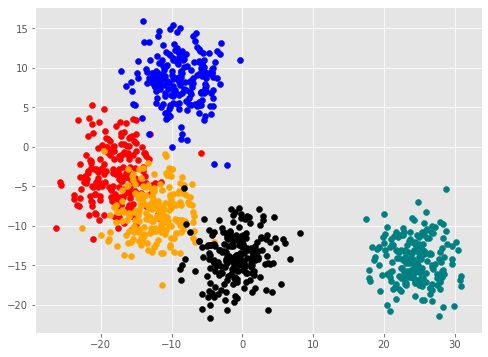

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X_5[:, 0][y_5==0], X_5[:, 1][y_5==0], c="red")
plt.scatter(X_5[:, 0][y_5==1], X_5[:, 1][y_5==1], c="blue")
plt.scatter(X_5[:, 0][y_5==2], X_5[:, 1][y_5==2], c="teal")
plt.scatter(X_5[:, 0][y_5==3], X_5[:, 1][y_5==3], c="orange")
plt.scatter(X_5[:, 0][y_5==4], X_5[:, 1][y_5==4], c="black")
plt.show()

In [16]:
# 格子状の点を用意
sample = np.array([(i, j) for i in np.arange(-30, 35, 0.1) for j in np.arange(-25, 20, 0.1)])

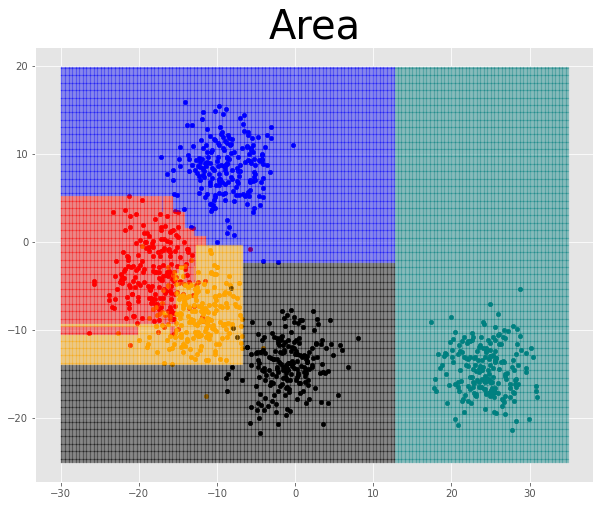

In [17]:
d_sample = xgb.DMatrix(sample)
pred = xgb_5.predict(d_sample, ntree_limit=xgb_5.best_ntree_limit)

plt.figure(figsize=(10,8))

# 元データをプロット
plt.scatter(X_5[:, 0][y_5==0], X_5[:, 1][y_5==0], c="red", s=20)
plt.scatter(X_5[:, 0][y_5==1], X_5[:, 1][y_5==1], c="blue", s=20)
plt.scatter(X_5[:, 0][y_5==2], X_5[:, 1][y_5==2], c="teal", s=20)
plt.scatter(X_5[:, 0][y_5==3], X_5[:, 1][y_5==3], c="orange", s=20)
plt.scatter(X_5[:, 0][y_5==4], X_5[:, 1][y_5==4], c="black", s=20)

# 格子状の点に対して推定したデータをプロット
plt.scatter(sample[pred==0, 0], sample[pred==0, 1], c="red", s=1, alpha=0.2)
plt.scatter(sample[pred==1, 0], sample[pred==1, 1], c="blue", s=1, alpha=0.2)
plt.scatter(sample[pred==2, 0], sample[pred==2, 1], c="teal", s=1, alpha=0.2)
plt.scatter(sample[pred==3, 0], sample[pred==3, 1], c="orange", s=1, alpha=0.2)
plt.scatter(sample[pred==4, 0], sample[pred==4, 1], c="black", s=1, alpha=0.2)
plt.title("Area", fontsize=40)
plt.show()